In [3]:
# import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import tweepy 



# Data Wrangling Project (Mohamed Makki)

# Gathering Data

### we have three types of data to be imported from different resources 

#### 1. file to be uploaded directly ('twitter_archive_enhanced.csv'), then reading the file in pandas . . . for our first dataset: twitter_arch_df  

In [4]:
# read the file in pandas
twitter_arch_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# last five rows in data set:
twitter_arch_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [6]:
# number of rows and columns
twitter_arch_df.shape

(2356, 17)

In [7]:
# let's find the sources of these tweets
twitter_arch_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [8]:
# what is the tweets pecentage that come from each these sources:
percentage = twitter_arch_df.source.value_counts()/twitter_arch_df.shape[0]
percentage.round(decimals=4) *100

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     94.27
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                         3.86
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      1.40
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>     0.47
Name: source, dtype: float64

In [9]:
# reading sample of tweets
sample_tweet = twitter_arch_df.iloc[501]

In [10]:
# reading the text of this tweet sample
sample_tweet.text

'This is Rocky. He got triple-doggo-dared. Stuck af. 11/10 someone help him https://t.co/soNL00XWVu'

In [11]:
# check the dog name of this tweet sample
sample_tweet.doggo

'doggo'

In [12]:
# the expended_url for the sample_tweet
sample_tweet.expanded_urls

'https://twitter.com/dog_rates/status/813096984823349248/photo/1'

#### so we find that the most of these tweets (more than 94%) come from iPhone.

#### 2. file to be downloaded programatically ('image-prediction.tsv'), from a url . . .
#### our second dataset: image_predict_df

In [13]:
# download file programatically from url ('image-prediction.tsv') 

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)
image_folder='image-predictions.tsv'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)
    
with open (os.path.join(image_folder,url.split('/')[-1]), mode='wb') as file:
    
    file.write(response.content)
    
os.listdir(image_folder)
image_predict_df=pd.read_csv(image_folder + '/image-predictions.tsv', sep='\t')
image_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# last five rows of this dataframe
image_predict_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [15]:
# number of rows, number of columns:
image_predict_df.shape

(2075, 12)

In [16]:
# information about type of columns, Number of rows for each columns, columns details
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# mean, min, max . . .etc
image_predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
# random sample rows from the dataframe:
image_predict_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True
677,683481228088049664,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
1946,862457590147678208,https://pbs.twimg.com/media/C_gQmaTUMAAPYSS.jpg,1,home_theater,0.496348,False,studio_couch,0.167256,False,barber_chair,0.052625,False


In [20]:
# image number repetition:  
image_predict_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [26]:
# sample of images
sample_image = image_predict_df.iloc[77]

In [27]:
# url for this sample image
sample_image.jpg_url

'https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg'

### importing data from Twitter API,
#### 3. for our third dataset: tweets_df

In [28]:
# as per twitter's API terms, the following keys and secrets will be hidden.

API_key = '******'
API_secret_key = '******'
Access_token = '******'
Access_token_secret = '******'

In [29]:
# importing from tweepy and timeit
  
from tweepy import OAuthHandler
from timeit import default_timer as timer

auth = tweepy.OAuthHandler(API_key, API_secret_key)
auth.set_access_token(Access_token, Access_token_secret)

api= tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [30]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_arch_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take time to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [32]:
# creating the third dataset (tweets_df)
tweets_data=[]
with open ('tweet_json.txt') as file:
    for line in file:
        try:
            tweet=json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api=pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

tweets_df=df_api[['id', 'retweet_count', 'favorite_count']]
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7833,36716
1,892177421306343426,5798,31620
2,891815181378084864,3843,23822
3,891689557279858688,8001,40063
4,891327558926688256,8638,38264


In [33]:
# last five rows:
tweets_df.tail() 

,id,retweet_count,favorite_count
2328,666049248165822465,41,99
2329,666044226329800704,134,276
2330,666033412701032449,43,117
2331,666029285002620928,43,121
2332,666020888022790149,472,2455


In [34]:
# number of rows, number of columns 
tweets_df.shape

(2333, 3)

In [35]:
# type of each column.
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [36]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2758.174025,7663.445349
std,6.820607e+16,4667.323948,11895.188117
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,555.000000,1328.000000
50%,7.184547e+17,1291.000000,3338.000000
75%,7.986654e+17,3208.000000,9411.000000
max,8.924206e+17,79194.000000,158659.000000


# ASSESSING

In [37]:
twitter_arch_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1214,715200624753819648,NaN,NaN,2016-03-30 15:34:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Michelangelope. He's half coffee cup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715200624...,12,10,Michelangelope,None,None,None,None
1754,678798276842360832,NaN,NaN,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678798276...,7,10,Linda,None,None,None,None
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
1939,673887867907739649,NaN,NaN,2015-12-07 15:32:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a great time sleeping and y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673887867...,10,10,None,None,None,None,None
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carper. He's a Tortellini Angiosperm. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305...,11,10,Carper,None,None,None,None
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372...,12,10,actually,None,None,None,None
1360,703268521220972544,NaN,NaN,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521...,12,10,None,None,None,pupper,None
1774,678023323247357953,6.780211e+17,4.196984e+09,2015-12-19 01:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After getting lost in Reese's eyes for several...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None


In [38]:
sum(twitter_arch_df.duplicated())

0

In [39]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [40]:
twitter_arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [41]:
# denominator value should be always 10. is there any with value !=10 . .  let's check
twitter_arch_df[twitter_arch_df['rating_denominator'] !=10] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [42]:
twitter_arch_df.duplicated().sum()

0

In [152]:
# let's check if we have rating_numerator exceed value = 14
twitter_arch_df['rating_numerator'].where(twitter_arch_df['rating_numerator'] >14).value_counts()

15.0      2
75.0      2
420.0     2
143.0     1
20.0      1
960.0     1
84.0      1
24.0      1
27.0      1
50.0      1
80.0      1
60.0      1
44.0      1
144.0     1
26.0      1
99.0      1
88.0      1
1776.0    1
666.0     1
204.0     1
45.0      1
165.0     1
182.0     1
121.0     1
17.0      1
Name: rating_numerator, dtype: int64

In [44]:
# let's check if all rating_denominator values = 10
twitter_arch_df[twitter_arch_df['rating_denominator'] !=10].count()[0] 

23

In [45]:
image_predict_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1939,860563773140209665,https://pbs.twimg.com/media/C_FWL0vVwAA13N7.jpg,1,Cardigan,0.583936,True,Pembroke,0.055979,True,beagle,0.045896,True
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False
1346,759197388317847553,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1,kuvasz,0.511341,True,golden_retriever,0.076899,True,white_wolf,0.063269,False
129,668286279830867968,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,1,golden_retriever,0.215944,True,basset,0.189214,True,Cardigan,0.113010,True
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
965,706265994973601792,https://pbs.twimg.com/media/Cc0pLU0WAAEfGEw.jpg,1,papillon,0.743715,True,Pekinese,0.114042,True,Saint_Bernard,0.047715,True
1273,750026558547456000,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,1,standard_poodle,0.258732,True,teddy,0.130760,False,toy_poodle,0.071726,True
1776,828376505180889089,https://pbs.twimg.com/media/C378BwxWMAA6CNK.jpg,1,American_Staffordshire_terrier,0.523086,True,Staffordshire_bullterrier,0.186168,True,Chihuahua,0.042089,True


In [46]:
# checking for duplicated rows
sum(image_predict_df.duplicated())

0

In [47]:
# check for (non-capitalized) dog names in p1.
image_predict_df.loc[image_predict_df.p1.str.contains('^[a-z]', regex=True)].count()[0] 

1135

In [48]:
# check for (non-capitalized) dog names in p2.
image_predict_df.loc[image_predict_df.p2.str.contains('^[a-z]', regex=True)].count()[0] 

1097

In [49]:
# check for (non-capitalized) dog names in p3.
image_predict_df.loc[image_predict_df.p3.str.contains('^[a-z]', regex=True)].count()[0] 

1131

In [50]:
tweets_df.sample(10)

,id,retweet_count,favorite_count
471,814153002265309185,9015,29708
2015,671550332464455680,203,892
322,832636094638288896,2849,16140
1847,675149409102012420,1660,3694
99,872620804844003328,3428,19836
1106,729823566028484608,1257,4020
713,781655249211752448,1164,4129
427,819347104292290561,1243,7431
1667,681340665377193984,285,1658
2206,668248472370458624,468,954


In [51]:
tweets_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [52]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2758.174025,7663.445349
std,6.820607e+16,4667.323948,11895.188117
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,555.000000,1328.000000
50%,7.184547e+17,1291.000000,3338.000000
75%,7.986654e+17,3208.000000,9411.000000
max,8.924206e+17,79194.000000,158659.000000


In [53]:
tweets_df.duplicated().sum()

0

## Quality Issues

#### 1. In first datset (twitter_arch_df) some columns contains only 78 rows.
#### 2. Some other columns contains 181 rows.
#### 3. In the second dataset (image_predict_df), some dogs names should be capitalized.
#### 4. In denominator column some values != 10
#### 5. In numerator column some values are very high
#### 6. In timestamp part of it should be removed . . meaningless information
#### 7. The timestamp column should be in numerical format, not string format (or object).
#### 8. Convert some columns from numeric to string.
#### 9. Changing column name when necessary.


## Tidiness Issues

#### 1. In the second dataset (image_predict_df) , there are four columns allocated for dogs breed names. 
#### 2. In the above dataset a new column should be created in replacement of the dropped columns above.
#### 3. In the same above dataset, there are nine columns for dog prediction and degree of confidence (p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf . . . we should tackle these columns and try to convert them to less columns(only two columns).
#### 4. In the same dataset, rating numerator & rating dominator need some adjustments.
#### 5. Instead of the above, a new column should be created; for dog_rating.


# Cleaning

#### before cleaning we have to work on a copy of each dataset, so we can safeguard our original datasets

In [98]:
# creating copies of each dataset

# copy first dataset:
copy_twitter_arch_df= twitter_arch_df.copy()

# copy second dataset:
copy_image_predict_df= image_predict_df.copy()

# copy third dataset:
copy_tweets_df= tweets_df.copy()


### Define

#### delete two columns in (twitter_arch_df)  [in_reply_to_status_id] & [in_reply_to_user_id] . . . contains only 78 rows.

### Code 

In [99]:
# deleting columns
copy_twitter_arch_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

### Test

In [100]:
# this will show that there is no more 'in_reply_to_status_id', 'in_reply_to_user_id' columns  
copy_twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 276.2+ KB


### Define

#### delete three columns in (twitter_arch_df)  [retweeted_status_id] & [retweeted_status_user_id] & [retweeted_status_timestamp]  . . . contains only 181 rows.

### Code 

In [101]:
# deleting columns
copy_twitter_arch_df.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [102]:
# this will show the three columns have been deleted
copy_twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Define

#### capitalize dogs breed names in (image_predict_df)

### Code

In [103]:
# capitalizing dogs' names
copy_image_predict_df['p1']=copy_image_predict_df['p1'].str.title()
copy_image_predict_df['p2']=copy_image_predict_df['p2'].str.title()
copy_image_predict_df['p3']=copy_image_predict_df['p3'].str.title()



### Test

In [104]:
# all related columns are now capitalized
copy_image_predict_df[['p1','p2', 'p3']].head()

,p1,p2,p3
0,Welsh_Springer_Spaniel,Collie,Shetland_Sheepdog
1,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback
2,German_Shepherd,Malinois,Bloodhound
3,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
4,Miniature_Pinscher,Rottweiler,Doberman


### Define

#### now we will tackle the denominator and numinator columns:
#### we know that the rating_denominator should be always 10 not more or less.
#### the rating_numerator may take any value above 10 till 14, but we know now there are some values exceeding this value and reach till 960. total numbers of these values not much = 28 values only.
#### to solve this issue in both rating_denominator and rating_numerator, we have more than one scenario / options to tackle these data.
#### 1. to divide rating_numerator / rating_denominator and result should be between (10/10 till 14/10). and consider any value above as outliers.
#### 2. to do same as above and consider any value above mentioned value as a new value like (15/10).
#### 3. to correct all values != 10 in rating_denominator columns (we have here 23 value less or greater than 10). 
#### then to correct all values above 14 in rating_numerator.
#### finally to calculate one value for rating by dividing rating_numerator / rating_denominator and creating new column named (rating)


#### we'll choose the 3rd option
#### correct some values in rating_denominator column, as this value should be of constant value = 10

### Code

In [105]:
# any rating denominator !=10 should be corrected to ==10 as per rating conditions
copy_twitter_arch_df['rating_denominator'].mask(copy_twitter_arch_df['rating_denominator'] !=10, 10, inplace=True)

### Test

In [106]:
# let's check if any row now has a rating_denominator !=10 . . .  
copy_twitter_arch_df[copy_twitter_arch_df['rating_denominator'] !=10].count()[0] 

0

### Define

#### correct some values in rating_numerator column, consider maximum value should not exceed 15

### Code

In [107]:
# replace any value in rating_numerator exceed 14 to be equal 15 (there are only 28 rating_numerator above 14 as we find above). 
copy_twitter_arch_df['rating_numerator'].values[copy_twitter_arch_df['rating_numerator'].values > 14] = 15

### Test

In [108]:
# now we'll chech if there is any value exceed the value of 15.
copy_twitter_arch_df[copy_twitter_arch_df['rating_numerator'] > 15].count()[0]

0

### Define

#### delete part of timestamp value/string (+0000) in timestamp column with meaningless indication.

### Code

In [109]:
# deleting the meaningless suffix, thr part (+0000) at the end of each timestamp.
copy_twitter_arch_df.timestamp = copy_twitter_arch_df.timestamp.str[:-5].str.strip()

### Test

In [110]:
# checking the new timestamp format by showing the first five values.
copy_twitter_arch_df.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

### Define

#### convert 'tweet_id' in all datasets from numeric to string, note that the tweet_id in the third dataframe named 'id'

### Code

In [111]:
# converting the tweet_id in the first dataframe (copy_twitter_arch_df)
copy_twitter_arch_df.tweet_id=copy_twitter_arch_df.tweet_id.astype('str')

In [112]:
# converting the tweet_id in the second dataframe (copy_image_predict_df)
copy_image_predict_df['tweet_id']=copy_image_predict_df['tweet_id'].astype('str')

In [113]:
# converting the id in the third dataframe (copy_tweets_df)
copy_tweets_df['id']=copy_tweets_df['id'].astype('str')

### Test

In [114]:
# testing the tweet_id type in first dataframe (copy_twitter_arch_df)
type(copy_twitter_arch_df['tweet_id'])

pandas.core.series.Series

In [115]:
# testing the tweet_id type in second dataframe (copy_image_predict_df)
type(copy_image_predict_df['tweet_id'])

pandas.core.series.Series

In [116]:
# testing the id type in third dataframe (copy_tweets_df)
type(copy_tweets_df['id'])

pandas.core.series.Series

### Define

#### change  column name from 'id' to 'tweet_id' and other column name from 'favorite_count' to 'likes' in the (copy_tweets_df)

### Code

In [117]:
# changing id to tweet_id, and favorite_count to likes in the third dataframe (copy_tweets_df)
copy_tweets_df.rename(columns={'id':'tweet_id', 'favorite_count': 'likes'}, inplace=True)

### Test

In [118]:
# testing the new columns's names.
copy_tweets_df.head(0)

,tweet_id,retweet_count,likes


# Tidiness

### Define

#### Create New Column "dog_stage" instead of four columns "doggo", "floofer", "pupper", "puppo" in copy_twitter_arch_df

### Code

In [119]:
# creating a new common column for "stage_of_dog" instead of four columns for each 
def dog_stage(df):
        dog_stage =[]
        if df['doggo'] =='doggo':
            dog_stage.append('doggo')
            
        if df['floofer'] =='floofer':
            dog_stage.append('floofer')
            
        if df['pupper'] =='pupper':
            dog_stage.append('pupper')
            
        if df['puppo'] =='puppo':
            dog_stage.append('puppo')
        
        if not dog_stage:
            return 'None'
        else:
            return ','.join(dog_stage)
        
copy_twitter_arch_df['dog_stage']=copy_twitter_arch_df.apply(lambda df: dog_stage(df), axis=1)

In [120]:
# checking whether new column (dog_stage)has been created
copy_twitter_arch_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None


### drop all four columns

### Code

In [121]:
# Now we'll drop the four unnecessary columns after creating the dog_stage column.
copy_twitter_arch_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

### Test

In [122]:
# test the new dataset after creating a new column and dropping the old four columns
copy_twitter_arch_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


### in the second dataframe (copy_image_predict_df) we have 9 columns for prediction and confidence of this prediction, we may create only two new columns one for dog prediction (prediction) and the other for confidence of this prediction (confidence).

### Define


#### create a prediction column and a confidence column from the nine existing columns ('p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p2_dog', 'p3_conf')

### Code

In [123]:
# creating the columns
prediction = []
confidence = []

# then define our function
def  prediction_confidence(row):
       
    if  row.p1_dog==True:
        prediction.append(row.p1)
        confidence.append(row.p1_conf)
        
    elif row.p2_dog==True:
        prediction.append(row.p2)
        confidence.append(row.p2_conf)
        
    elif row.p3_dog==True:
        prediction.append(row.p3)
        confidence.append(row.p3_conf)
        
    else:
        prediction.append('NaN')
        confidence.append(0)
        
copy_image_predict_df.apply(prediction_confidence, axis=1)

        
copy_image_predict_df['prediction']= prediction
copy_image_predict_df['confidence']= confidence
 

In [124]:
# cheching whether the two columns (prediction column & confidence column) have been created or not
copy_image_predict_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True,Welsh_Springer_Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,Redbone,0.506826


In [125]:
# drop all unnecessary columns in this dataframe 
copy_image_predict_df.drop(['img_num', 'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf'], axis=1, inplace = True)

### Test
 

In [126]:
# checking the final result of creating new columns and deleting old columns
copy_image_predict_df.head(2)

,tweet_id,jpg_url,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826


### Define

### Drop the (rating_denominator) column (column with one value = 10)

### Code

In [127]:
# dropping the column
copy_twitter_arch_df.drop(['rating_denominator'], axis=1, inplace = True)

### keep the values in rating_numerator column unchanged.

### Code

In [84]:
# maintain the same value of rating = rating_numerator / rating_denominator by dividing the values of each on a constant value of rating_denominator = 10
copy_twitter_arch_df['rating_numerator']= copy_twitter_arch_df['rating_numerator'].div(10)

### Code

### rename the (rating_numerator) column to (rating) . this will be considered the only rating column 

### Code

In [128]:
# renamig the rating_numerator column to rating
copy_twitter_arch_df.rename(columns={'rating_numerator':'rating'}, inplace=True)

### Test 

In [129]:
# check the alteration in the column name
copy_twitter_arch_df.sample(0)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage


# Merging Datasets then saving the resulting dataset for the next step.

### Define

### merging the three datasets to get one clean dataset (twitter_archive_master.csv) as requested.

### saving the resulting dataset 

### reading the new dataset in pandas

### Code

In [130]:
# merging the three dataframe to create one dataframe (new_df)
new_df=copy_twitter_arch_df.merge(copy_image_predict_df, on=['tweet_id']).merge(copy_tweets_df, on=['tweet_id'])

In [131]:
# saving the (new_df) in csv format 
# name it: (twitter_archive_master)
new_df.to_csv('twitter_archive_master.csv', encoding='utf', index=False)

In [132]:
# reading our new dataframe
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')

### Test

In [133]:
# the first three rows of our new dataframe
twitter_archive_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,prediction,confidence,retweet_count,likes
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,7833,36716
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5798,31620
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3843,23822


In [134]:
# the last three rows of our new dataframe
twitter_archive_master.tail(3)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,prediction,confidence,retweet_count,likes
2058,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,a,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_Shepherd,0.596461,43,117
2059,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,a,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,43,121
2060,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.465074,472,2455


In [135]:
# numbers of columns and rows
twitter_archive_master.shape

(2061, 13)

In [140]:
# time period of this dog rating
start_date = twitter_archive_master.timestamp.min()
end_date = twitter_archive_master.timestamp.max()
start_date, end_date

('2015-11-15 22:32:08', '2017-08-01 16:23:56')

In [136]:
# data type of each
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 13 columns):
tweet_id         2061 non-null int64
timestamp        2061 non-null object
source           2061 non-null object
text             2061 non-null object
expanded_urls    2061 non-null object
rating           2061 non-null int64
name             2061 non-null object
dog_stage        2061 non-null object
jpg_url          2061 non-null object
prediction       1738 non-null object
confidence       2061 non-null float64
retweet_count    2061 non-null int64
likes            2061 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 209.4+ KB


In [137]:
twitter_archive_master.describe()

,tweet_id,rating,confidence,retweet_count,likes
count,2.061000e+03,2061.000000,2061.000000,2061.000000,2061.000000
mean,7.378612e+17,10.617661,0.462371,2638.619602,8091.122271
std,6.755694e+16,2.219367,0.339115,4611.633207,12222.732040
min,6.660209e+17,0.000000,0.000000,11.000000,0.000000
25%,6.762636e+17,10.000000,0.139613,562.000000,1542.000000
50%,7.113638e+17,11.000000,0.456047,1245.000000,3561.000000
75%,7.928838e+17,12.000000,0.772685,3027.000000,10106.000000
max,8.924206e+17,15.000000,0.999956,79194.000000,158659.000000


In [138]:
# top likes
twitter_archive_master.likes.max()

158659

In [139]:
# top retweet_count
twitter_archive_master.retweet_count.max()

79194

# Analyzing and Visualizing

In [142]:
# cheching the time period of these tweets for rating dogs
start_date = twitter_archive_master.timestamp.min()
end_date = twitter_archive_master.timestamp.max()

start_date, end_date

('2015-11-15 22:32:08', '2017-08-01 16:23:56')

In [149]:
# first three tweets with top likes
twitter_archive_master.sort_values(by = 'likes', ascending=False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,prediction,confidence,retweet_count,likes
840,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_Retriever,0.825333,79194,158659
320,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_Terrier,0.196015,44661,135296
423,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,57749,122570


In [153]:
#  first three tweets with top rating
twitter_archive_master.sort_values(by= 'rating', ascending = False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,prediction,confidence,retweet_count,likes
791,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,15,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,NaN,0.000000,2503,5209
336,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,15,None,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_Highland_White_Terrier,0.872064,3334,12553
1368,684225744407494656,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,15,None,None,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,Golden_Retriever,0.203249,212,1242


In [154]:
#  first three tweets with top retweet_count
twitter_archive_master.sort_values(by= 'retweet_count', ascending = False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,prediction,confidence,retweet_count,likes
840,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_Retriever,0.825333,79194,158659
875,739238157791694849,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_Dog,0.503372,58689,117237
423,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,Stephan,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,57749,122570


In [156]:
#  first three tweets with top confidence in dog breed prediction
twitter_archive_master.sort_values(by= 'confidence', ascending = False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,jpg_url,prediction,confidence,retweet_count,likes
1911,668636665813057536,2015-11-23 03:46:18,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,an,None,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,Komondor,0.999956,480,1023
690,762464539388485633,2016-08-08 01:44:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. His father was a bear and his m...,https://twitter.com/dog_rates/status/762464539...,12,Buddy,None,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,Chow,0.999953,4290,10546
1196,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,15,None,None,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,Labrador_Retriever,0.999885,1410,3460
1585,675149409102012420,2015-12-11 03:05:37,"<a href=""http://twitter.com/download/iphone"" r...",holy shit 12/10 https://t.co/p6O8X93bTQ,https://twitter.com/dog_rates/status/675149409...,12,None,None,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,Chow,0.999876,1660,3694
1047,709566166965075968,2016-03-15 02:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Olaf. He's gotta be rare. Seems sturdy...,https://twitter.com/dog_rates/status/709566166...,12,Olaf,None,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,Chow,0.999837,1217,3580
377,814986499976527872,2016-12-31 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,https://twitter.com/dog_rates/status/814986499...,11,Cooper,pupper,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,Dalmatian,0.999828,1330,7890
607,777621514455814149,2016-09-18 21:33:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. You can't look at him and not s...,https://twitter.com/dog_rates/status/777621514...,12,Derek,None,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,Chow,0.999823,2578,9031
269,831322785565769729,2017-02-14 02:02:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,https://twitter.com/dog_rates/status/831322785...,12,Pete,doggo,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,Old_English_Sheepdog,0.999715,1588,9419
1450,680115823365742593,2015-12-24 20:00:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9,Ozzy,None,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,Pug,0.999365,912,2742
1198,697259378236399616,2016-02-10 03:22:44,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,https://twitter.com/dog_rates/status/697259378...,8,getting,None,https://pbs.twimg.com/media/Ca0ps3AXEAAnp9m.jpg,Great_Dane,0.999223,1017,3335


In [250]:
# numbers distribution of each dog prediction
dog_breed_prediction_count = twitter_archive_master.groupby('prediction')['prediction'].count()
dog_breed_prediction_count

prediction
Afghan_Hound                       4
Airedale                          12
American_Staffordshire_Terrier    15
Appenzeller                        2
Australian_Terrier                 2
Basenji                            9
Basset                            17
Beagle                            21
Bedlington_Terrier                 6
Bernese_Mountain_Dog              11
Black-And-Tan_Coonhound            2
Blenheim_Spaniel                  11
Bloodhound                         7
Bluetick                           4
Border_Collie                     12
Border_Terrier                     7
Borzoi                            11
Boston_Bull                       12
Bouvier_Des_Flandres               1
Boxer                             11
Brabancon_Griffon                  3
Briard                             3
Brittany_Spaniel                   8
Bull_Mastiff                       5
Cairn                              3
Cardigan                          23
Chesapeake_Bay_Retriever   

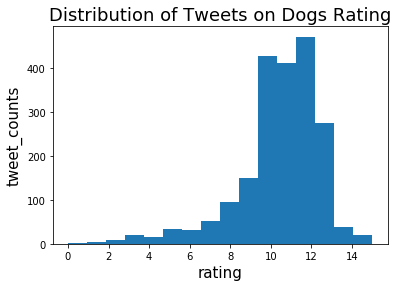

In [208]:
# Distribution of numbers of Tweets on Dogs Rating

twitter_archive_master['rating'].plot(kind='hist', bins=16)
plt.title('Distribution of Tweets on Dogs Rating', fontsize=18)
plt.xlabel('rating', fontsize=15)
plt.ylabel('tweet_counts', fontsize=15)
plt.show();

### the histogram is left skewed

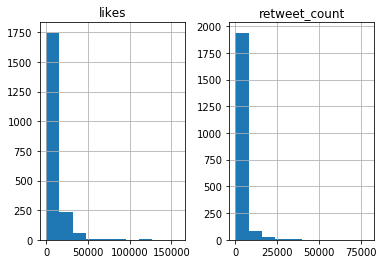

In [189]:
twitter_archive_master.hist(column=['likes', 'retweet_count']); 

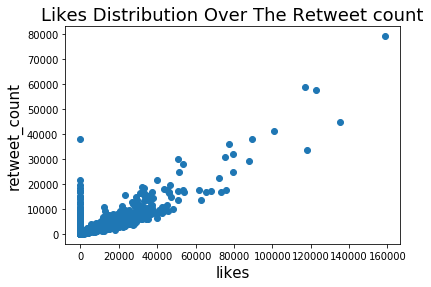

In [213]:
# relationshp between likes and reweet_count
plt.scatter(twitter_archive_master['likes'], twitter_archive_master['retweet_count'])
plt.ylabel('retweet_count', fontsize=15);
plt.xlabel('likes', fontsize=15);
plt.title('Likes Distribution Over The Retweet count', fontsize=18);
plt.show();
 

In [197]:
# correlation coefficient of likes & retweet count, positive and strong
correlation = twitter_archive_master[['retweet_count', 'likes']].corr(method='pearson')
correlation

,retweet_count,likes
retweet_count,1.000000,0.857108
likes,0.857108,1.000000


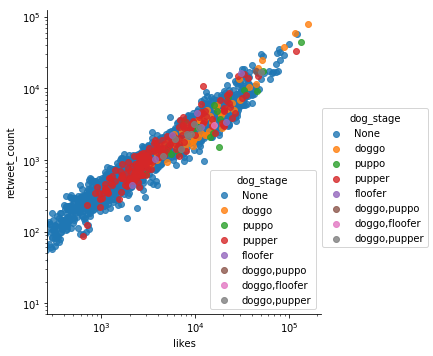

In [218]:
# distribution of likes vs retweet_count for each dog_stage

sns.lmplot(x="likes", y= "retweet_count", data=twitter_archive_master, hue='dog_stage', fit_reg=False)
plt.legend(title='dog_stage')
plt.xscale('log');
plt.yscale('log')

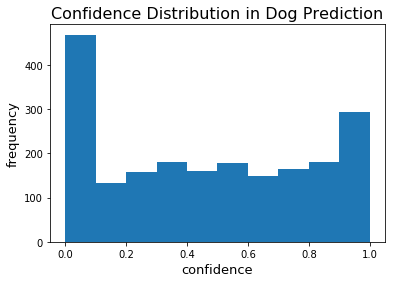

In [262]:

fig, ax = plt.subplots()
plt.hist(twitter_archive_master.confidence);
plt.title('Confidence Distribution in Dog Prediction', fontsize=16);
ax.set_ylabel('frequency', fontsize=13);
ax.set_xlabel('confidence', fontsize=13);

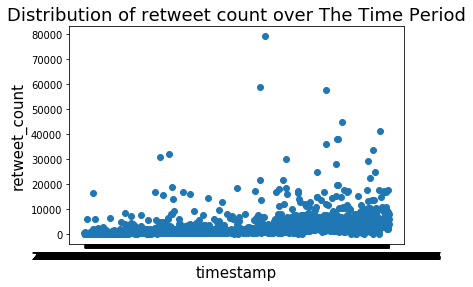

In [229]:
# plotting the distribution of retweet count over the time period of dog rating.
plt.scatter(twitter_archive_master['timestamp'], twitter_archive_master['retweet_count'])
plt.ylabel('retweet_count', fontsize=15);
plt.xlabel('timestamp', fontsize=15);
plt.title('Distribution of retweet count over The Time Period', fontsize=18);
plt.show();
 

In [298]:
# distribution of dog_stage 
pd.value_counts(twitter_archive_master['dog_stage'])

None             1742
pupper            211
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [299]:
# let's exclude the None value from our calculations to see the disribution of dog_stage with defined stage
pd.value_counts(twitter_archive_master['dog_stage'] =='None')

True     1742
False     319
Name: dog_stage, dtype: int64

In [300]:
# numbers of undefined dog_stage (None)
pd.value_counts(twitter_archive_master['dog_stage'] =='None')[1]

1742

In [301]:
# number of defined dog_stage
pd.value_counts(twitter_archive_master['dog_stage'] =='None')[0]

319

In [304]:
pd.value_counts(twitter_archive_master['dog_stage'])

None             1742
pupper            211
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [309]:
# count of pupper
pd.value_counts(twitter_archive_master['dog_stage']=='pupper')[1]

211

In [310]:
# count of doggo
pd.value_counts(twitter_archive_master['dog_stage']=='doggo')[1]

65

In [311]:
# count of puppo
pd.value_counts(twitter_archive_master['dog_stage']=='puppo')[1]

23

In [312]:
# count of doggo,pupper
pd.value_counts(twitter_archive_master['dog_stage']=='doggo,pupper')[1]

11

In [313]:
# count of floofer
pd.value_counts(twitter_archive_master['dog_stage']=='floofer')[1]

7

In [314]:
# count of doggo,puppo
pd.value_counts(twitter_archive_master['dog_stage']=='doggo,puppo')[1]

1

In [315]:
# count of doggo,floofer
pd.value_counts(twitter_archive_master['dog_stage']=='doggo,floofer')[1]

1

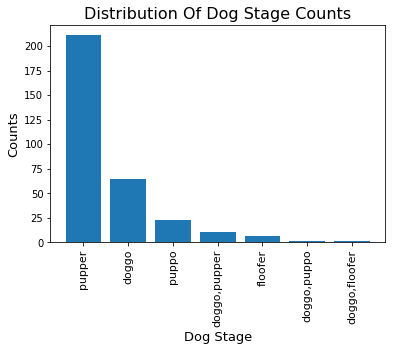

In [327]:
#
plt.bar([1, 2, 3, 4, 5, 6, 7],[211, 65, 23, 11, 7, 1, 1], tick_label=['pupper', 'doggo', 'puppo', 'doggo,pupper', 'floofer', 'doggo,puppo', 'doggo,floofer'])
plt.title('Distribution Of Dog Stage Counts', fontsize=16)
plt.xlabel('Dog Stage', fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.xticks(rotation = 90, fontsize=11);

 

### 2. Number of dog breed prediction = 113 breed of dogs

### 3. Most rating lies between 10 to 12

### 4. there is a strong positive correlation between retweet counts and likes counts

### 5. The tweet count is almost evenly distributed over the time period, but there is a tangible increment near the period end.

### 6. regarding the dog_stage, about 66% of the defined stage are pupper, then doggo (about 7%) and puppo about (7%)